##Without any training and testing just plotting the PCA with 3 main components

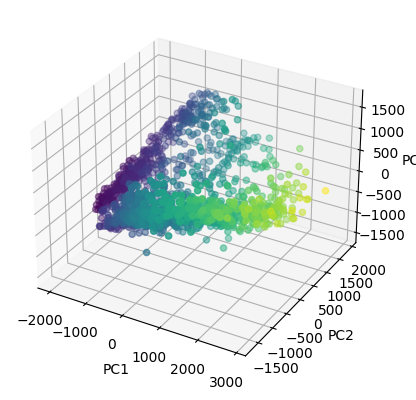

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


df = pd.read_csv('fashion-mnist_test.csv', on_bad_lines='skip')

df.dropna(inplace=True)

pca = PCA(n_components=3)


pca_data = pca.fit_transform(df)

fig = plt.figure()
color=pca_data[:,0]
colormap=plt.get_cmap('viridis')
ax = fig.add_subplot(111, projection='3d')


ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2],cmap=colormap,c=color)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')



plt.show()


## Now ploting 3d plot of PCA of 3 main components with training and testing set

In [2]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("fashion-mnist_test.csv")

X = data.drop('label', axis=1)
y = data['label']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [3]:
pca = PCA(n_components=3)
X_pca_train = pca.fit_transform(X_train)
X_pca_test= pca.transform(X_test)

Text(0.5, 0.92, 'PCA of Fashion-MNIST ')

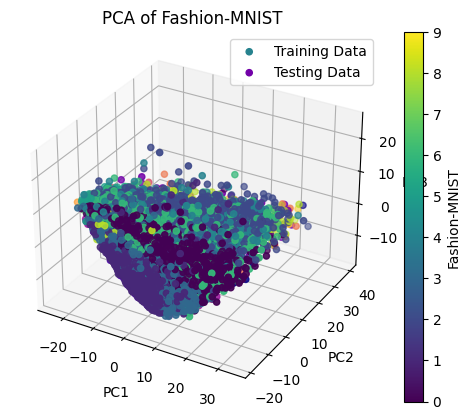

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter=ax.scatter(X_pca_train[:, 0], X_pca_train[:, 1], X_pca_train[:, 2], c=y_train, cmap='viridis', label='Training Data')
ax.scatter(X_pca_test[:, 0], X_pca_test[:, 1], X_pca_test[:, 2], c=y_test, cmap='plasma', label='Testing Data')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

cbar = plt.colorbar(scatter)
cbar.set_label('Fashion-MNIST')

plt.legend(loc='best')
plt.title('PCA of Fashion-MNIST ')
